In [165]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Overview

In this notebook, we will explore two datasets:
1) Covid-19 related data
2) Air Quality Index data

The idea is to compare data from both datasets to understand whether covid-19 had any impact on the Air Quality. According to IQAir (https://www.iqair.com/malta), in 2021, Malta's most polluted city was L-Imsida and therefore we will be analysizing whether the Air Quality had improved, worsened, or remained as is during the covid period 2020 - 2022.

In [34]:
AQIfile = open( './Data/msida-AQI.csv', 'r')
CovidTestsfile = open( './Data/COVIDTests.csv', 'r')
CovidCasesfile = open('./Data/COVID19.csv')


# Data Preperation

The first step is to understand the data. Both of the datasets will be imported into dataframes to visualise the data better. Since covid started in 2020, we will be removing older data (<2020) from the AQI Dataset.


In [35]:
def chr_int(a):
    if a.isdigit():
        return int(a)
    else:
        return 0
                
AQIdata=[]
for line in AQIfile:
    data1=line.split(',')
    if len(data1)==7:
        AQIdata.append([pd.to_datetime(data1[0],format="%d/%m/%Y"),chr_int(data1[1]),chr_int(data1[2]),chr_int(data1[3]),chr_int(data1[4]),chr_int(data1[5]),chr_int(data1[6])])
        
covidtestsdata=[]
for line in CovidTestsfile:
    data1=line.split(',')
    if len(data1)==7:
        covidtestsdata.append([pd.to_datetime(data1[0],format="%d/%m/%Y"),chr_int(data1[1]),chr_int(data1[2]),chr_int(data1[3]),chr_int(data1[4]),chr_int(data1[5]),chr_int(data1[6])])  
        
covidcases=[]
for line in CovidCasesfile:
    data1=line.split(',')
    if len(data1)==6:
        covidcases.append([pd.to_datetime(data1[0],format="%d/%m/%Y"),chr_int(data1[1]),chr_int(data1[2]),chr_int(data1[3]),chr_int(data1[4]),chr_int(data1[5])])          

In [36]:

aqi_df = pd.DataFrame(AQIdata) 
covidtests_df = pd.DataFrame(covidtestsdata)
covidcases_df = pd.DataFrame(covidcases)

In [37]:
aqi_df.dtypes

0    datetime64[ns]
1             int64
2             int64
3             int64
4             int64
5             int64
6             int64
dtype: object

In [38]:
covidtests_df.dtypes

0    datetime64[ns]
1             int64
2             int64
3             int64
4             int64
5             int64
6             int64
dtype: object

In [39]:
covidcases_df.dtypes

0    datetime64[ns]
1             int64
2             int64
3             int64
4             int64
5             int64
dtype: object

In [40]:
aqi_df.columns = ["Date", "pm25", "pm10", "o3", 
                "no2", "so2", "co"]


covidtests_df.columns = ["Date","NAA tests in previous day","Total NAA tests","Rapid antigen tests in previous day","Total rapid antigen tests",
                         "NAA and rapid antigen tests in previous day","Total NAA and rapid antigen tests"]

covidcases_df.columns = ["Date","New Cases","Total Cases","Recovered","Deaths","Active Cases"]


In [41]:
aqi_df = aqi_df.sort_values('Date')
aqi_df = aqi_df[aqi_df.Date >= '2020-07-20']

In [42]:
covidtests_df = covidtests_df[covidtests_df.Date >= '2020-07-20' ]
covidtests_df = covidtests_df.sort_values('Date')

In [43]:
covidcases_df = covidcases_df[covidcases_df.Date >= '2020-07-20']
covidcases_df = covidcases_df.sort_values('Date')

In [44]:
covidcases_df

,Date,New Cases,Total Cases,Recovered,Deaths,Active Cases
136,2020-07-20,1,677,664,9,0
137,2020-07-21,0,677,664,9,0
138,2020-07-22,2,679,665,9,0
139,2020-07-23,1,680,665,9,0
140,2020-07-24,6,686,665,9,0
...,...,...,...,...,...,...
1024,2022-12-25,16,116247,114763,813,0
1025,2022-12-26,6,116253,114773,813,0
1026,2022-12-27,27,116280,114787,813,0
1027,2022-12-28,23,116303,114814,813,0


# Data Exploration

In this step, we will be exploring the datasets and seeing different trends within each dataset

In [212]:
covidcases_df['YearMonth'] = covidcases_df.Date.dt.to_period('M')

In [213]:
MonthlyCovidCases_df =  covidcases_df.groupby([covidcases_df['YearMonth']]).agg({'New Cases':sum})
#.plot(legend=True)

In [227]:
MonthlyDeaths_df = covidcases_df.groupby([covidcases_df['YearMonth']]).agg({'Deaths':max})
MonthlyDeaths_df = MonthlyDeaths_df['Deaths'] - MonthlyDeaths_df['Deaths'].shift(fill_value=0)
MonthlyCovidCases_df["New Deaths"] = MonthlyDeaths_df

In [229]:
MonthlyRecoveries_df = covidcases_df.groupby([covidcases_df['YearMonth']]).agg({'Recovered':max})
MonthlyRecoveries_df = MonthlyRecoveries_df['Recovered'] - MonthlyRecoveries_df['Recovered'].shift(fill_value=0)
MonthlyCovidCases_df["New Recoveries"] = MonthlyRecoveries_df

In [232]:
MonthlyCovidCases_df

,New Cases,New Deaths,New Recoveries
YearMonth,,,
2020-07,148,9,665
2020-08,1164,3,735
2020-09,1175,22,1162
2020-10,2984,28,1593
2020-11,3831,75,3510
2020-12,2901,82,3456
2021-01,5129,48,3839
2021-02,4579,48,4487
2021-03,6551,77,8358


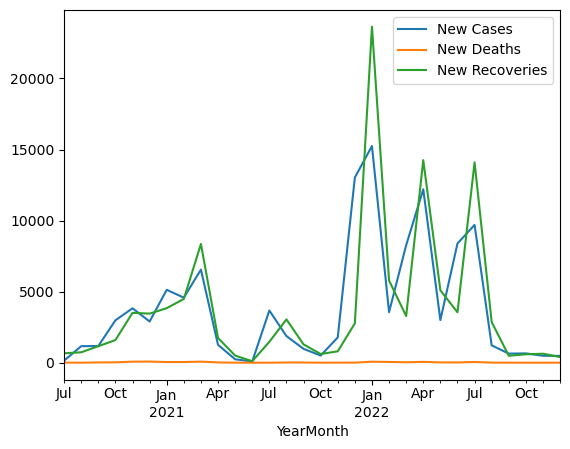

In [235]:
MonthlyCovidCases_df_pt = MonthlyCovidCases_df.plot(legend=True)

In [220]:
#MonthlyNewCases_df = covidcases_df.groupby([covidcases_df['Date'].rename('Year').dt.year, covidcases_df['Date'].rename('Month').dt.month]).agg({'New Cases':sum})

In [221]:
#MonthlyDeaths_df = covidcases_df.groupby([covidcases_df['Date'].dt.year, covidcases_df['Date'].dt.month]).agg({'Deaths':max})
#MonthlyDeaths_df = MonthlyDeaths_df['Deaths'] - MonthlyDeaths_df['Deaths'].shift(fill_value=0)
#MonthlyNewCases_df["New Deaths"] = MonthlyDeaths_df

In [222]:
#MonthlyRecoveries_df = covidcases_df.groupby([covidcases_df['Date'].dt.year, covidcases_df['Date'].dt.month]).agg({'Recovered':max})
#MonthlyRecoveries_df = MonthlyRecoveries_df['Recovered'] - MonthlyRecoveries_df['Recovered'].shift(fill_value=0)
#MonthlyNewCases_df["New Recoveries"] = MonthlyRecoveries_df

In [223]:
#MonthlyNewCases_df1 = MonthlyNewCases_df
#MonthlyNewCases_df1["tEST"] = pd.DataFrame(pd.to_datetime(covidcases_df['Date']).dt.to_period('M'))

In [233]:
#MonthlyNewCases_df